<a href="https://colab.research.google.com/github/T-Schwab/QM2/blob/main/Dam_Reservoirs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd

In [3]:
# Read the shapefile
gdf = gpd.read_file("GDW_reservoirs_v1_0.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   GDW_ID         RES_NAME             DAM_NAME        ALT_NAME  \
0       1    Lake Winnipeg               Jenpeg      Split Lake   
1       2          Ontario             Iroquois            None   
2       3           Baikal              Irkutsk            None   
3       4    Lake Victoria           Owen Falls            None   
4       5  Southern Indian  Missi Falls Control  Notigi Control   

           DAM_TYPE LAKE_CTRL         RIVER ALT_RIVER MAIN_BASIN  \
0  Lake Control Dam       Yes        Nelson      None       None   
1  Lake Control Dam       Yes  St. Lawrence      None       None   
2  Lake Control Dam       Yes        Angara      None       None   
3  Lake Control Dam       Yes    White Nile      None       Nile   
4  Lake Control Dam       Yes     Churchill       Rat       None   

       SUB_BASIN  ... LONG_DAM LAT_DAM ORIG_SRC POLY_SRC GRAND_ID  HYRIV_ID  \
0           None  ...      0.0     0.0    GRanD   CanVec      709  70125969   
1           None  ...      0.0

<Axes: >

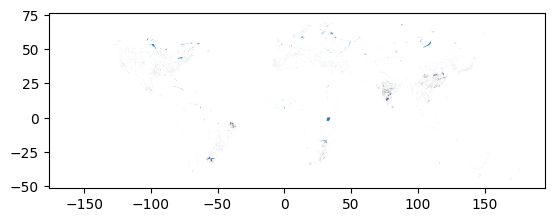

In [4]:
gdf.plot()